# **GLOBAL HOTEL BOOKING DEMAND**

## INTRODUCTION

This data set contains booking information for a city hotel and a resort hotel. It includes information such as when the booking was made, length of stay, the number of adults, children,  babies ,  the number of available parking spaces etc. The hotel industry experienced significant fluctuations in booking demand from 2015 to 2017. This period was marked by a variety of factors influencing customer behaviour and booking patterns. Analysing this data can help hotel owners understand specific cancellation patterns and guest behaviour patterns. This understanding can then be used to implement measures to reduce cancellations and secure revenue. 

## PURPOSE OF ANALYSIS

The purpose of analysing the Hotel Booking Demand dataset is to gain insights into the booking behaviour of customers and the factors influencing their decisions12. Here are some key objectives of this analysis:

1.	**Investigate Cancellations:**
    The analysis can help identify patterns in booking cancellations. Understanding these patterns can assist hotel owners in implementing strategies to reduce cancellations and secure revenuent


2.	**Understand Guest Behaviour:**
    By examining the data, hotel owners can understand specific guest behaviour patterns. This can help them tailor their services to meet the needs and preferences of their guests.

3.	**Optimize Revenue:**
    The analysis can also aid in demand-based room pricing. By understanding the factors affecting booking demand, hotel owners can adjust their room prices accordingly to maximize revenue.

4.	**Improve Services:**
    The dataset includes information about the type of hotel, number of adults, stay duration, special requirements, etc. Analysing this data can help hotel owners improve their services and offerings based on what their guests really want.

## 	ORIGIN OF THE DATA 

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The data was downloaded and cleaned by **Issika Dey, Yagnasani Mukherjee and Sumi Paul**.

##	INSIGHTS

1. **General Trends:**

    What is the current global trend in hotel bookings?

2. **Seasonal Variations:**

    Which is the busiest month for hotel?

3. **Regional Insights:**

    From which country most guest come?

    Are there any regions facing challenges or a decline in demand?

4. **Booking Platforms:**

    How Many Booking Were Cancelled?
   
    What is the percentage of booking for each year?
   
    What are the preferred online platforms for hotel bookings globally?

6. **Traveler Preferences:**

    How Long People Stay in the hotel?

    What are the key factors influencing traveler choices when booking a hotel?

    Do travelers prioritize specific amenities or services when making a booking?

7. **Technology Impact:**

    How has technology, such as mobile apps or AI, affected the hotel booking industry?

    Are there any emerging technologies that are reshaping the way people book hotels?

## Packages Import:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [3]:
## Importing Data
data = pd.read_csv('hotel_bookings.csv')

In [4]:
## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Day,Month,Year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,1,7,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,1,7,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,United Kingdom,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,2,7,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,United Kingdom,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,2,7,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,United Kingdom,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,3,7,2015


## Data Pre-Processing :

In [5]:
## Copy the dataset
df = data.copy()

### 1. Dealing with Missing Values

In [6]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                           25708
agent                              5637
country                             460
hotel                                 0
previous_bookings_not_canceled        0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
customer_type                         0
dtype: int64

In [7]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)


## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)


## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

### 2. Converting Datatype

In [8]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

## Exploratory Data Analysis:

In [9]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [10]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

# LET'S SOLVE THE INSIGHTS

## 1. General Trends:

### What is the current global trend in hotel bookings?

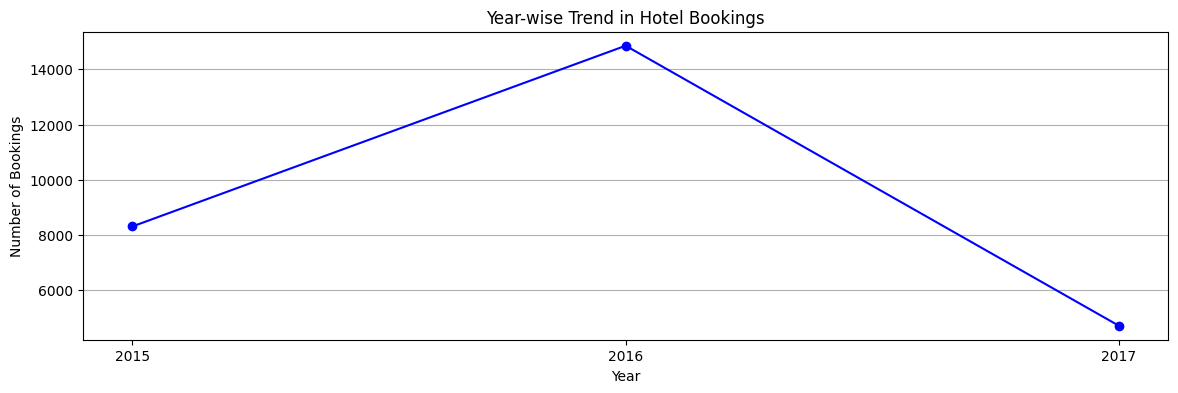

In [68]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Group by year and count the number of bookings for each year
yearly_bookings = df.groupby('arrival_date_year').size()

# Plot the trend
plt.figure(figsize=(14, 4))
plt.plot(yearly_bookings, marker='o', linestyle='-', color='blue')
#plt.bar(yearly_bookings.index, yearly_bookings, color='skyblue')
plt.title('Year-wise Trend in Hotel Bookings')
plt.xlabel('Year')
plt.xticks(yearly_bookings.index.astype(int))  # Setting x-axis ticks without decimal places
plt.ylabel('Number of Bookings')
plt.grid(axis='y')
plt.show()

## 2.Seasonal Variations:

### Which is the busiest month for hotel?

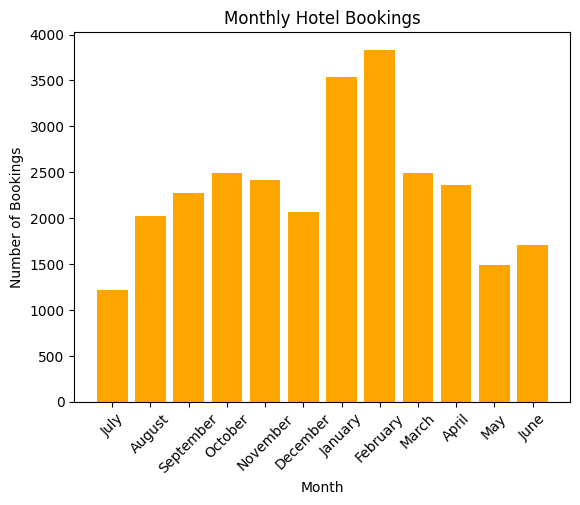

The most busy month for the hotel is February.


In [52]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Convert the 'arrival_date_month' column to datetime format
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B')

# Group by month and count the number of bookings
monthly_bookings = df.groupby(df['arrival_date_month'].dt.month)['is_canceled'].count()

# Plotting the bar chart
plt.bar(monthly_bookings.index, monthly_bookings.values, color='orange')
plt.title('Monthly Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(monthly_bookings.index, df['arrival_date_month'].dt.strftime('%B').unique(), rotation=45)
plt.show()

# Find the busiest month
busiest_month = monthly_bookings.idxmax()
print(f"The most busy month for the hotel is {df['arrival_date_month'].dt.strftime('%B').unique()[busiest_month - 1]}.")

## 3.Regional Insights:

### From which country most guest come?

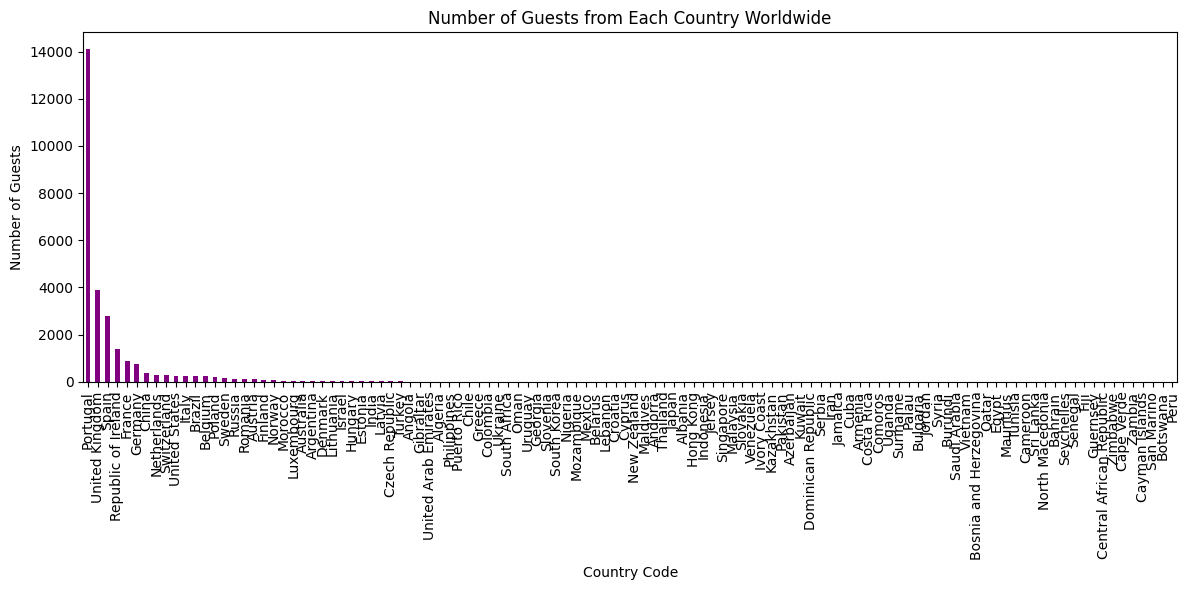

In [60]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Group data by country and count the number of guests
guests_by_country = df['country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
guests_by_country.plot(kind='bar', color='purple')

# Add labels and title
plt.xlabel('Country Code')
plt.ylabel('Number of Guests')
plt.title('Number of Guests from Each Country Worldwide')

# Show the plot
plt.tight_layout()
plt.show()

### Are there any regions facing challenges or a decline in demand?


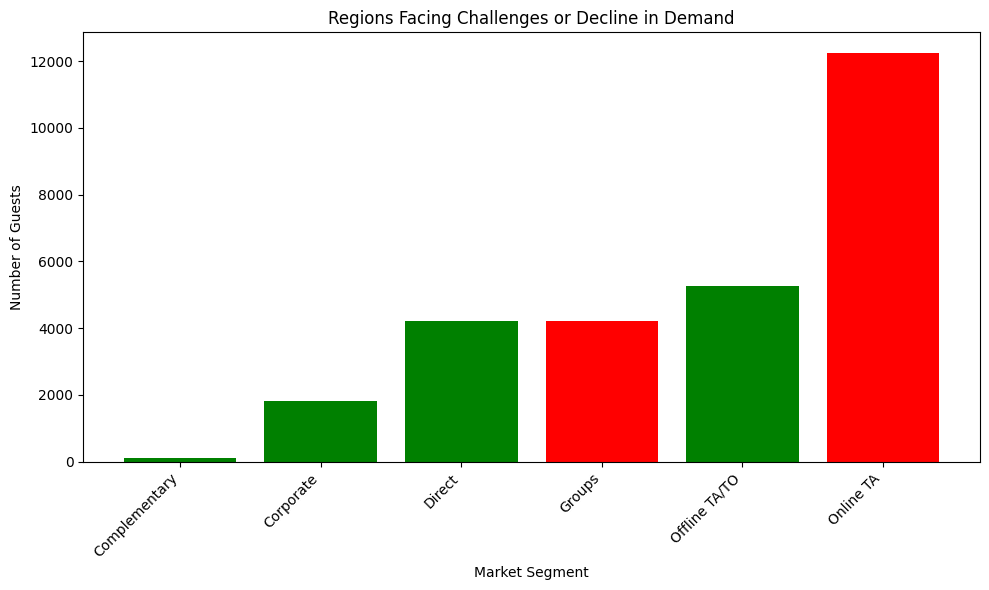

In [59]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Group data by hotel type and calculate the total number of guests for each type
region_guests = df.groupby('market_segment')['is_canceled'].count()

# Filter only regions with a decline in demand (canceled bookings)
decline_regions = region_guests[region_guests.index.isin(['Online TA', 'Groups'])]

# Create a column chart
plt.figure(figsize=(10, 6))
colors = ['red' if region in decline_regions.index else 'green' for region in region_guests.index]
plt.bar(region_guests.index, region_guests, color=colors)

# Add labels and title
plt.xlabel('Market Segment')
plt.ylabel('Number of Guests')
plt.title('Regions Facing Challenges or Decline in Demand')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4.Booking Platforms:

### How Many Booking Were Cancelled?

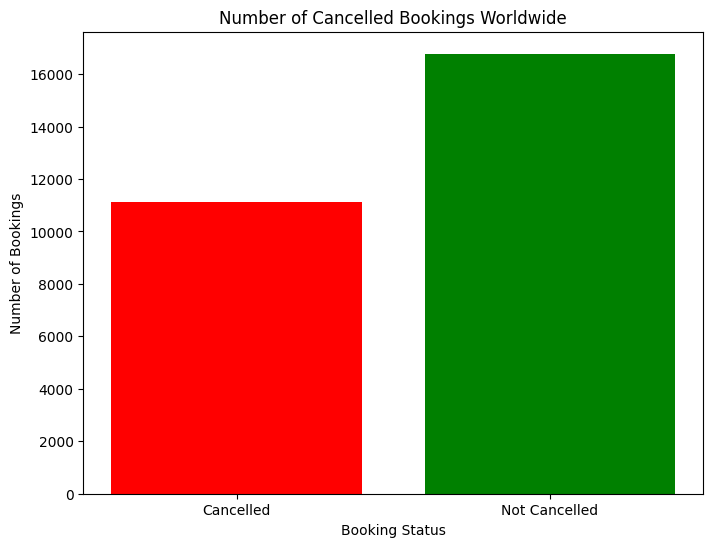

In [31]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Count the number of bookings that were canceled
cancelled_bookings = df[df['is_canceled'] == 1]['is_canceled'].count()

# Count the number of bookings that were not canceled
not_cancelled_bookings = df[df['is_canceled'] == 0]['is_canceled'].count()

# Create a column chart
plt.figure(figsize=(8, 6))
plt.bar(['Cancelled', 'Not Cancelled'], [cancelled_bookings, not_cancelled_bookings], color=['red', 'green'])

# Add labels and title
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.title('Number of Cancelled Bookings Worldwide')

# Show the plot
plt.show()

###  What is the percentage of booking for each year?

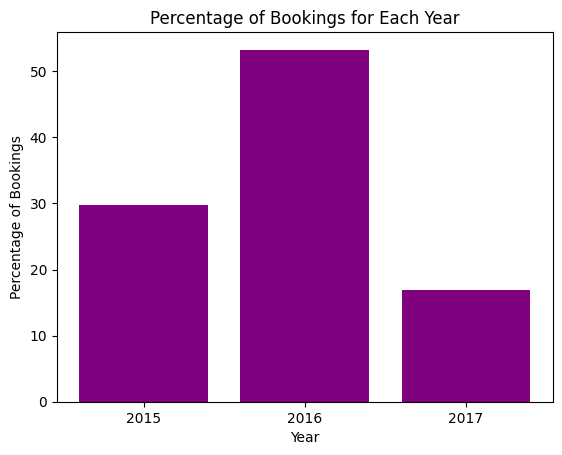

In [35]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Assuming the dataset has a column named 'arrival_date_year'
# You may need to adjust this based on the actual column name in your dataset
yearly_bookings = df['arrival_date_year'].value_counts().sort_index()

# Calculate the percentage for each year
total_bookings = yearly_bookings.sum()
percentage_bookings = (yearly_bookings / total_bookings) * 100

# Plotting the bar chart
plt.bar(percentage_bookings.index, percentage_bookings.values, color='purple')
plt.xlabel('Year')
plt.ylabel('Percentage of Bookings')
plt.title('Percentage of Bookings for Each Year')
plt.xticks(percentage_bookings.index)
plt.show()

### What are the preferred online platforms for hotel bookings globally?

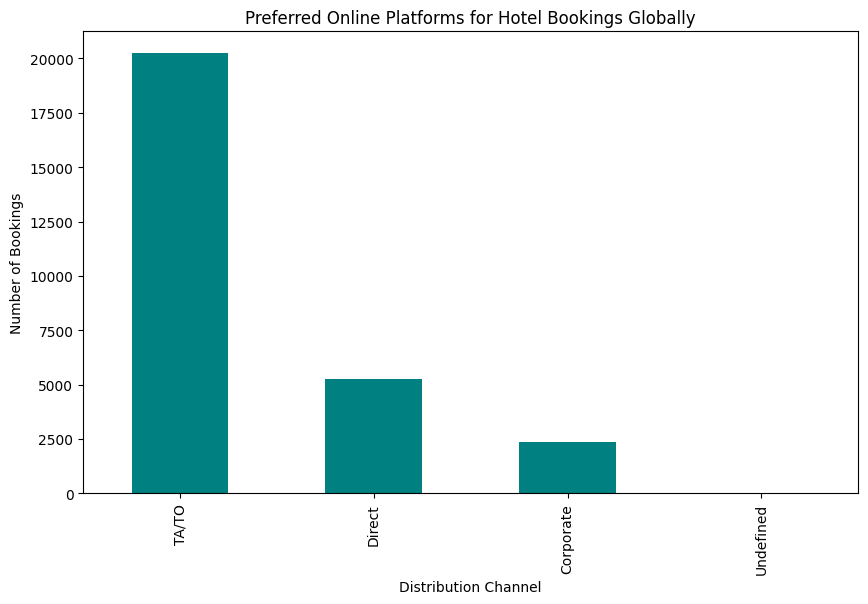

Booking sources distribution:
distribution_channel
TA/TO        20227
Direct        5277
Corporate     2382
Undefined        1
Name: count, dtype: int64


In [44]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Count the occurrences of each distribution channel
booking_sources = df['distribution_channel'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
booking_sources.plot(kind='bar', color='teal')
plt.title('Preferred Online Platforms for Hotel Bookings Globally')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

print("Booking sources distribution:")
print(booking_sources)

## 5.Traveller Preferences:

### How Long People Stay in the hotel?

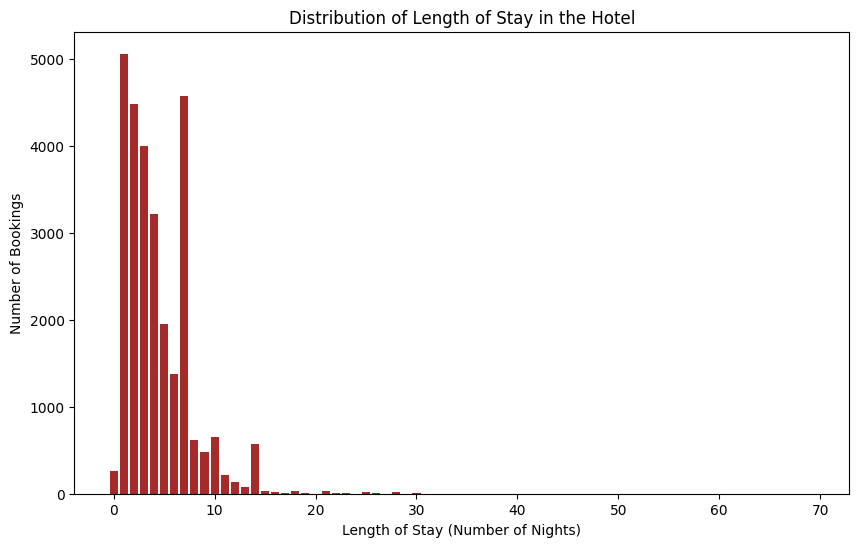

In [51]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Calculate the length of stay (number of nights)
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group data by length of stay and count the occurrences
stay_distribution = df['length_of_stay'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(stay_distribution.index, stay_distribution, color='brown')

# Add labels and title
plt.xlabel('Length of Stay (Number of Nights)')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Length of Stay in the Hotel')

# Show the plot
plt.show()

### What are the key factors influencing traveller choices when booking a hotel?

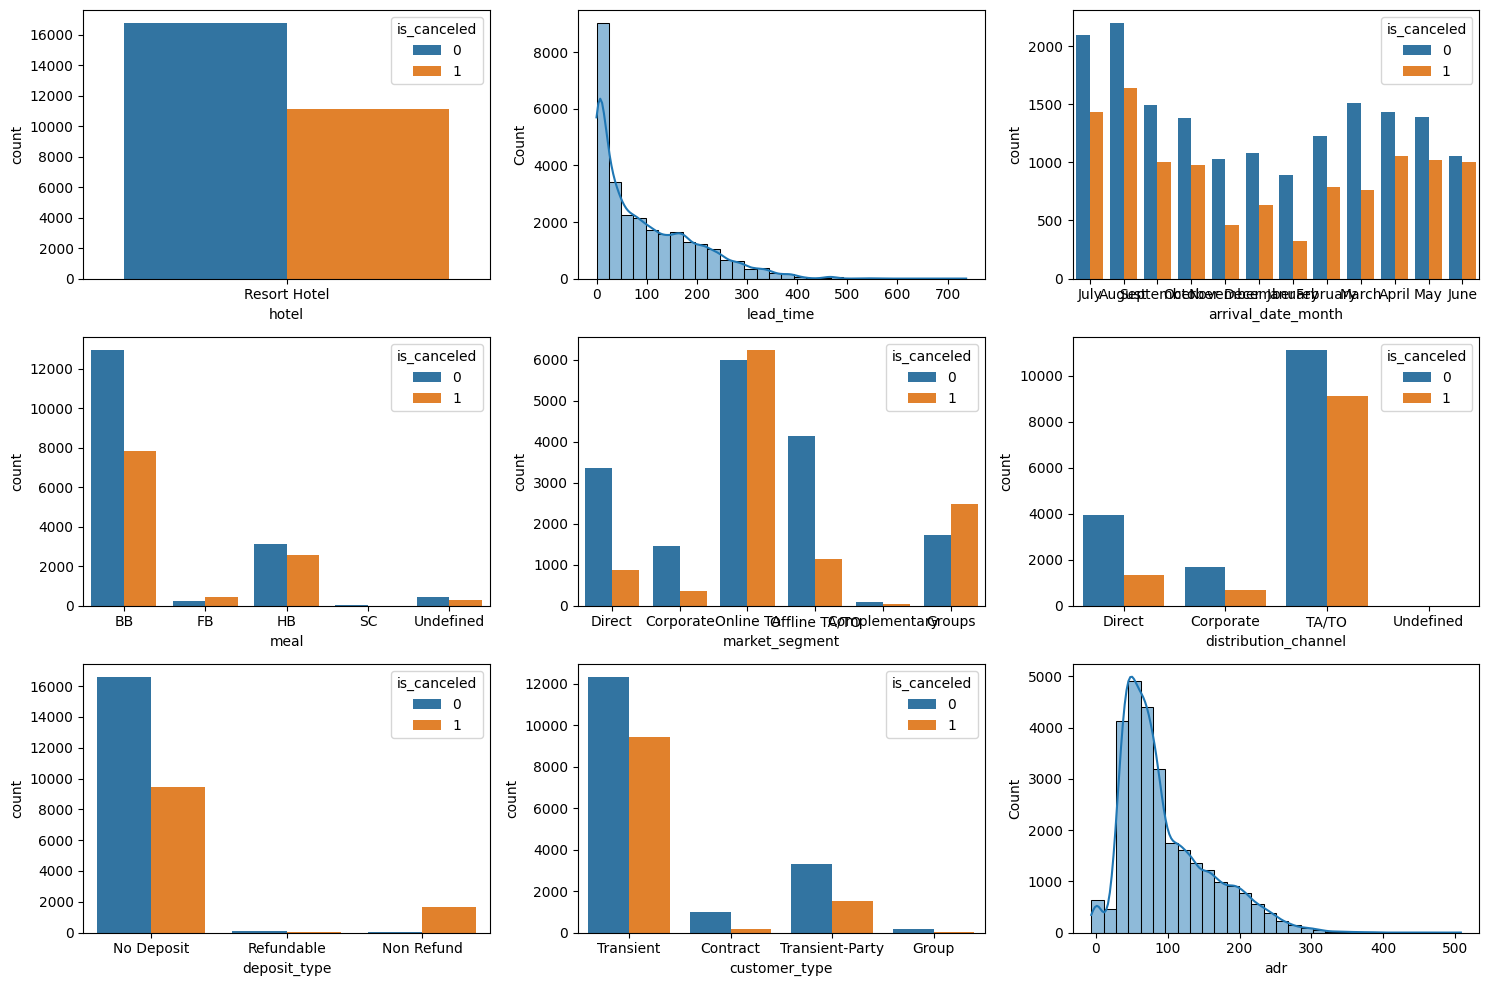

In [62]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Extract relevant columns for analysis
booking_factors = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

# Analyze key factors
plt.figure(figsize=(15, 10))

# Plot the cancellation rate by hotel type
plt.subplot(3, 3, 1)
sns.countplot(x='hotel', hue='is_canceled', data=booking_factors)

# Plot the lead time distribution
plt.subplot(3, 3, 2)
sns.histplot(booking_factors['lead_time'], bins=30, kde=True)

# Plot the cancellation rate by month
plt.subplot(3, 3, 3)
sns.countplot(x='arrival_date_month', hue='is_canceled', data=booking_factors, order=df['arrival_date_month'].unique())

# Plot the cancellation rate by meal type
plt.subplot(3, 3, 4)
sns.countplot(x='meal', hue='is_canceled', data=booking_factors)

# Plot the cancellation rate by market segment
plt.subplot(3, 3, 5)
sns.countplot(x='market_segment', hue='is_canceled', data=booking_factors)

# Plot the cancellation rate by distribution channel
plt.subplot(3, 3, 6)
sns.countplot(x='distribution_channel', hue='is_canceled', data=booking_factors)

# Plot the cancellation rate by deposit type
plt.subplot(3, 3, 7)
sns.countplot(x='deposit_type', hue='is_canceled', data=booking_factors)

# Plot the cancellation rate by customer type
plt.subplot(3, 3, 8)
sns.countplot(x='customer_type', hue='is_canceled', data=booking_factors)

# Plot the average daily rate distribution
plt.subplot(3, 3, 9)
sns.histplot(booking_factors['adr'], bins=30, kde=True)

plt.tight_layout()
plt.show()

### Do travelers prioritize specific amenities or services when making a booking?

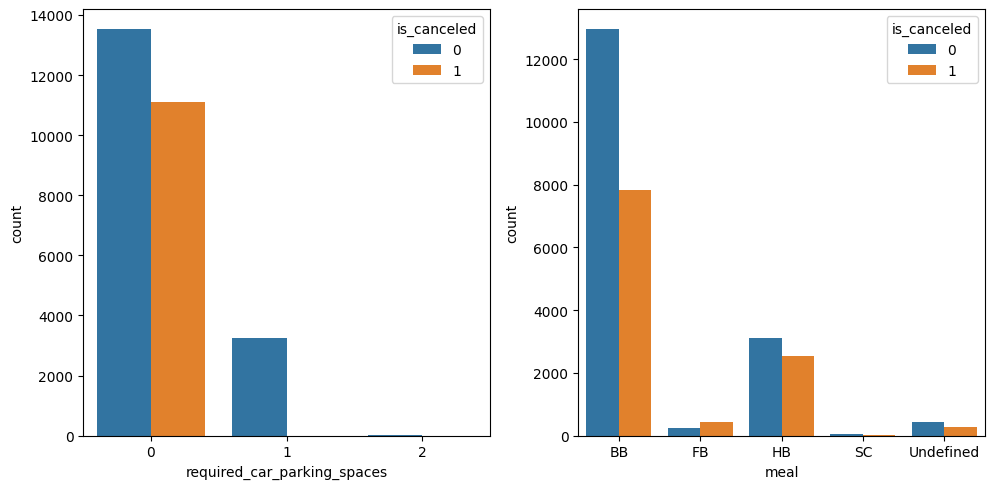

In [70]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Extract relevant columns for analysis
amenities_factors = df[['is_canceled', 'required_car_parking_spaces', 'total_of_special_requests', 'meal']]

# Analyze preferences for amenities
plt.figure(figsize=(15, 5))

# Plot the cancellation rate by parking spaces
plt.subplot(1, 3, 1)
sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=amenities_factors)

# Plot the cancellation rate by meal type
plt.subplot(1, 3, 2)
sns.countplot(x='meal', hue='is_canceled', data=amenities_factors)

plt.tight_layout()
plt.show()

## 6.Technology Impact:

### How has technology, such as mobile apps or AI, affected the hotel booking industry?

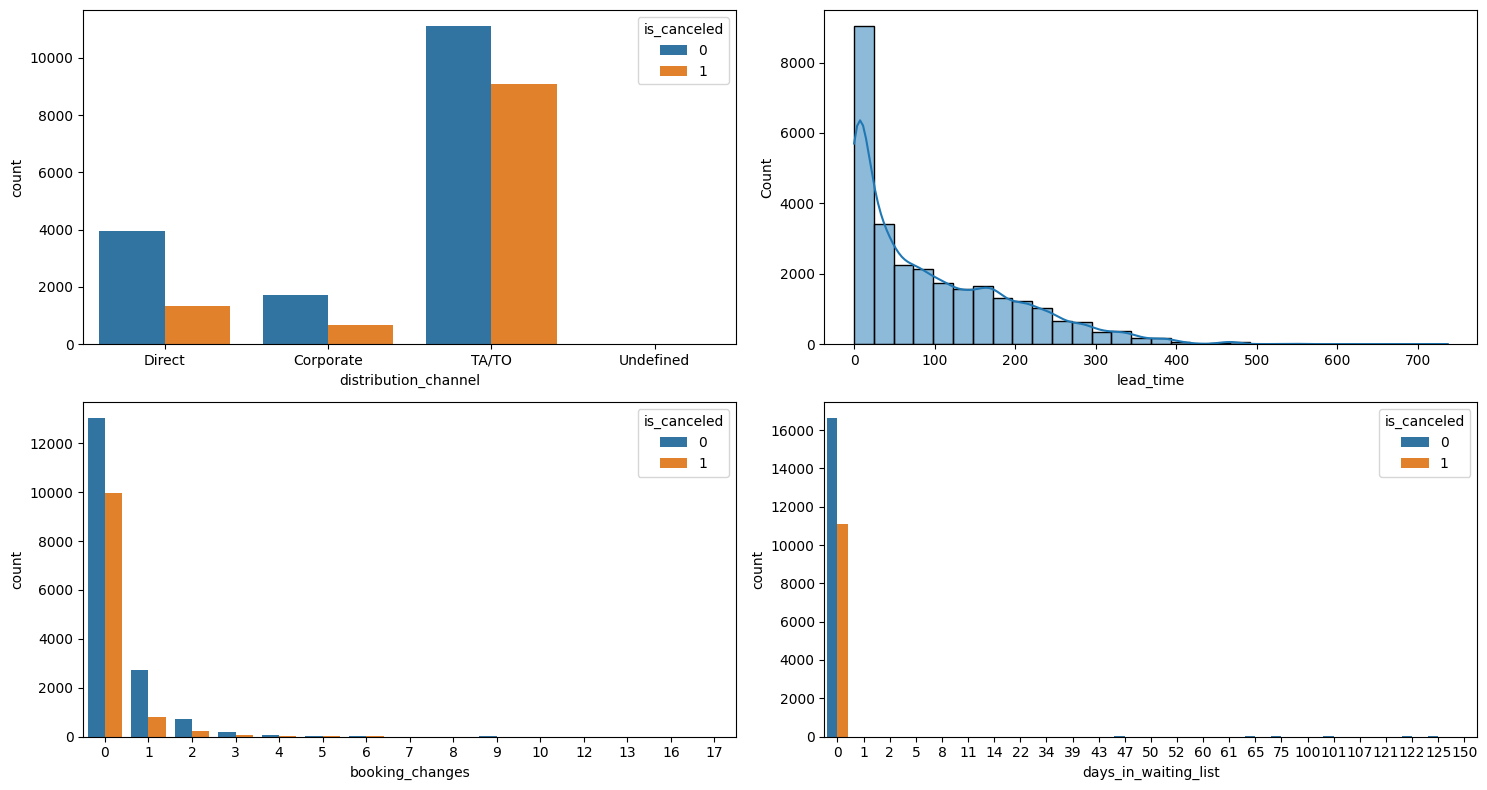

In [152]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Extract relevant columns for analysis
technology_factors = df[['is_canceled', 'lead_time', 'distribution_channel', 'booking_changes', 'days_in_waiting_list']]

# Analyze the impact of technology on hotel bookings
plt.figure(figsize=(15, 8))

# Plot the cancellation rate by distribution channel
plt.subplot(2, 2, 1)
sns.countplot(x='distribution_channel', hue='is_canceled', data=technology_factors)

# Plot the distribution of lead times
plt.subplot(2, 2, 2)
sns.histplot(technology_factors['lead_time'], bins=30, kde=True)

# Plot the cancellation rate by the number of booking changes
plt.subplot(2, 2, 3)
sns.countplot(x='booking_changes', hue='is_canceled', data=technology_factors)

# Plot the cancellation rate by the days in waiting list
plt.subplot(2, 2, 4)
sns.countplot(x='days_in_waiting_list', hue='is_canceled', data=technology_factors)

plt.tight_layout()
plt.show()

### Are there any emerging technologies that are reshaping the way people book hotels?

C:\Users\Personal\AppData\Local\Temp\ipykernel_18792\2730174039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='distribution_channel', data=df, palette='viridis')


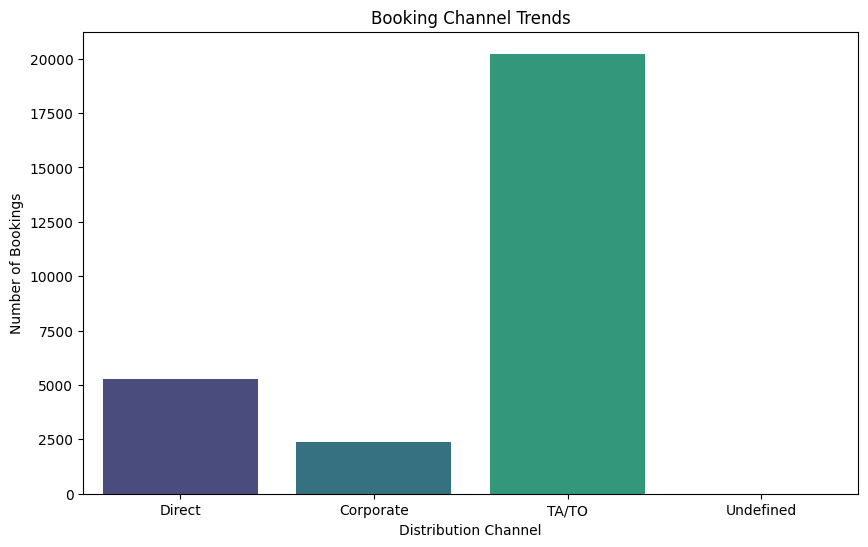

In [153]:
# Load the data from the CSV file
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Extract relevant columns for analysis
booking_channels = df['distribution_channel']

# Analyze trends in booking channels
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=df, palette='viridis')
plt.title('Booking Channel Trends')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

# CONCLUSION:

## 1. Under Gobal trend

From output of gobal trend in hotel booking we can draw the conclusion that Based on the graph, the hotel bookings saw a significant increase from 2015 to 2016, reaching its peak in 2016. However, there was a sharp decline in bookings in 2017. This suggests a volatile trend in hotel bookings over these years. Also we can state that demand changes pattern are also noticed over here  Further analysis may be required to understand the factors contributing to these fluctuations.


## 2. Under the Seasonal variation  From the second graph we can state the trend in global hotel bookings The bar graph indicates that February is the busiest month for hotel bookings, with the highest number of bookings compared to other months. This suggests that hotel demand peaks in February, which could be due to various factors such as holidays, events, or seasonal travel trends. Further analysis may be required to understand the specific reasons behind this peak.  


## 3. Under Regional variationThe graph we used to show From which country most guest come.. Shows that Portugal is dominating over all countries for most guest visit..


2nd The bar graph titled “Regions Facing Challenges or Decline in Demand” shows the number of guests in different market segments. The “Online TA” segment, marked in red, is facing a decline with over 10,000 guests. All other segments - “Complementary”, “Corporate”, “Direct”,”, and “Offline TA/TO” are marked in green, indicating they are not facing a decline and have a stable number of guests. This suggests that while online travel agencies are experiencing a decrease in demand, other booking channels remain stable.

## 4. Under booking platforms
In the booking platform we can state that The bar chart titled “Number of Bookings Cancelled” shows that a significant number of bookings were not cancelled, outnumbering the ones that were cancelled. This shows that most guests followed through with their bookings, indicating a high level of commitment or satisfaction with the booking process or the hotel itself, also through booking status we can draw conclusion by saying that the highest percentage of hotel booking was done in the year 2016 and least in the year 2017.
In the graph title “Preferred Online Platforms for Hotel Bookings Globally” shows that T/A/O is the most preferred online platform for hotel bookings, with a significantly higher number of bookings compared to Direct and Corporate channels. However, there’s no  clear data available for the “Unidentified” category. This suggests that T/A/O is the dominant platform for hotel bookings globall



## 5. Under travellers preference  
To see how long people spend their days in the hotel we drew a graph though which we can justify that most people spend at least 1-7 days so we can say that the majority of hotel bookings are for a short duration, with a significant number of bookings for stays of less than 10 nights. The frequency of bookings decreases sharply as the length of stay increases, indicating that guests typically prefer shorter stays at the hotel.


2nd part we derived the key factors that influencing the travellers preference  and that’s states  in resort hotel we can see the not cancelled status is higher than that of cancelled one next the increasing in lead time lead to decrease in hotel booking by travellers , 3rd graph stating that august being the peak month of hotel booking highest no of cancellation and non cancellation is been noticed over here the most than all other months . on the basis of  4th graph- meal we can see that BB is the factor that affected the travellers the most than FB, SC ,HB and undefined .

5th In the market segment online TA is  leading over all other parts of the segment .

6th graph showing that TA/TO is leading over all other platforms under distribution channel.

7th graph showing deposit type , we can derive that no deposit type faced both high cancelation and not cancelled by travellers whereas in refundable it was quite negligible and non refundable type travellers chooses cancellation the most .

8th graph -Inside the graph customer type it shows that the transient type is leading for both cancelation and non cancellation of hotel booking ,in 9th graph  lastly the ADR (average daily rate ) the trends shows that from zero to below hundred range  it shows a significant increase in hotel booking and then it started declining .

Also for specific amenities 
Traveller chooses hotel parking area we saw cancelation done was above 10000 whereas non cancellation done by  over 13000 travellers globally ,
For meal meal we can see that BB is the factor that affected the travellers the most than FB, SC ,HB and undefined.

## 6. Under technology impact 
For our queries regarding How has technology, such as mobile apps or AI, affected the hotel booking industry, We run the test and it result to show we derived that under distribution channel TA/TO faced the highest impact and all other remain stabe.


The 2nd graph representing lead time shows that the majority of hotel bookings are made with a short lead time, indicating that many customers book their stays close to the date of arrival. As the lead time increases, the number of bookings significantly decreases, suggesting that long-term planning is less common among these hotel guests.

3rd graph shows that most bookings, especially those with zero changes, were not cancelled. However, as the number of booking changes increases, the number of bookings significantly decreases. This suggests that customers who make changes to their bookings are more likely to cancel, and stability in booking details leads to a higher likelihood of follow-through.

Lastly due to wating list also we saw no unusual cancellation rather the not cancelled number is higher than that of cancelled one.

Again through the graph emerging technologies that are reshaping the way people book hotels we can again state that the trending booking channel is of TA/TO while all other remain in normal position lower than TA/TO . 

After doing all the research on these hotel booking platforms we drew several conclusions although due to data constraint we lacked in showing many other factors that are affecting the hotel business.